In [29]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [30]:
import tensorflow as tf
def solve_cudnn_error():
    gpus = tf.config.experimental.list_physical_devices('GPU')
    if gpus:
        try:
            # Currently, memory growth needs to be the same across GPUs
            for gpu in gpus:
                tf.config.experimental.set_memory_growth(gpu, True)
            logical_gpus = tf.config.experimental.list_logical_devices('GPU')
            print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPUs")
        except RuntimeError as e:
            # Memory growth must be set before GPUs have been initialized# Memory growth must be set before GPUs have been initialized
            print(e)
solve_cudnn_error()

1 Physical GPUs, 1 Logical GPUs


In [31]:
# use only train_2.csv
#import zipfile as zip

#zip.ZipFile('/kaggle/input/web-traffic-time-series-forecasting/train_2.csv.zip').extractall()
train_2 = pd.read_csv('E:/Server_mantain/web-traffic-time-series-forecasting/train_2.csv/train_2.csv')

In [32]:
print(train_2.shape)
train_2.head()

(145063, 804)


,Page,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,2NE1_zh.wikipedia.org_all-access_spider,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,2PM_zh.wikipedia.org_all-access_spider,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,3C_zh.wikipedia.org_all-access_spider,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,4minute_zh.wikipedia.org_all-access_spider,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0


In [33]:
# fill NaN to 0
train_2 = train_2.fillna(0)
train_2 = train_2.drop('Page', axis = 1)
train_2

,2015-07-01,2015-07-02,2015-07-03,2015-07-04,2015-07-05,2015-07-06,2015-07-07,2015-07-08,2015-07-09,2015-07-10,...,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10
0,18.0,11.0,5.0,13.0,14.0,9.0,9.0,22.0,26.0,24.0,...,19.0,33.0,33.0,18.0,16.0,27.0,29.0,23.0,54.0,38.0
1,11.0,14.0,15.0,18.0,11.0,13.0,22.0,11.0,10.0,4.0,...,32.0,30.0,11.0,19.0,54.0,25.0,26.0,23.0,13.0,81.0
2,1.0,0.0,1.0,1.0,0.0,4.0,0.0,3.0,4.0,4.0,...,6.0,6.0,7.0,2.0,4.0,7.0,3.0,4.0,7.0,6.0
3,35.0,13.0,10.0,94.0,4.0,26.0,14.0,9.0,11.0,16.0,...,7.0,19.0,19.0,9.0,6.0,16.0,19.0,30.0,38.0,4.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,16.0,16.0,19.0,9.0,20.0,23.0,28.0,14.0,8.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145058,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,3.0,6.0,5.0,2.0,4.0,4.0,8.0,2.0
145059,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,4.0,7.0,5.0,0.0,5.0,5.0,2.0,2.0,4.0
145060,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,11.0,25.0,22.0,47.0,42.0,13.0,9.0,21.0,16.0,6.0
145061,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,6.0,5.0,1.0,5.0,8.0,2.0,4.0,3.0,3.0


In [27]:
dataset.shape

(803, 1)

In [28]:
dataset = train_2.iloc[train_2.shape[0] - 1, :].values#選擇最後一條803
print(dataset.shape)#803
# data normalization
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
dataset = scaler.fit_transform(np.reshape(dataset, (-1, 1)))#803,1

x_train = dataset[0:train_2.shape[1] - 1]
y_train = dataset[1:train_2.shape[1]]

x_train.shape, y_train.shape

(803,)


((802, 1), (802, 1))

In [34]:
from sklearn.model_selection import train_test_split

x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size = 0.2)
x_train.shape

(641, 1)

In [40]:
y_train.shape

(641, 1)

In [41]:
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

def build_model():
    x = Input(shape = (x_train.shape[1], x_train.shape[2]))
    out = x
    
    out = LSTM(16)(out)
    out = Dense(1, activation = 'sigmoid')(out)

    model = Model(x, out, name = 'WTTSF')
    return model

model = build_model()
model.summary()

Model: "WTTSF"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 1, 1)]            0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                1152      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [42]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)
mc = ModelCheckpoint('check.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [43]:
model.compile(loss = 'mean_squared_error', optimizer = 'adam', metrics = ['acc'])
history = model.fit(x_train, y_train, epochs = 200, batch_size = 8, validation_data = (x_valid, y_valid), callbacks = [es, mc])

Epoch 1/200
81/81 [==============================] - 2s 9ms/step - loss: 0.2258 - acc: 0.7406 - val_loss: 0.1777 - val_acc: 0.7267

Epoch 00001: val_acc improved from -inf to 0.72671, saving model to check.h5
Epoch 2/200
81/81 [==============================] - 0s 4ms/step - loss: 0.1633 - acc: 0.7316 - val_loss: 0.1093 - val_acc: 0.7267

Epoch 00002: val_acc did not improve from 0.72671
Epoch 3/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0943 - acc: 0.7405 - val_loss: 0.0566 - val_acc: 0.7267

Epoch 00003: val_acc did not improve from 0.72671
Epoch 4/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0471 - acc: 0.7512 - val_loss: 0.0304 - val_acc: 0.7267

Epoch 00004: val_acc did not improve from 0.72671
Epoch 5/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0273 - acc: 0.7447 - val_loss: 0.0193 - val_acc: 0.7267

Epoch 00005: val_acc did not improve from 0.72671
Epoch 6/200
81/81 [==============================] - 0s 4ms/ste


Epoch 00045: val_acc did not improve from 0.72671
Epoch 46/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0020 - acc: 0.7503 - val_loss: 0.0069 - val_acc: 0.7267

Epoch 00046: val_acc did not improve from 0.72671
Epoch 47/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 0.7718 - val_loss: 0.0069 - val_acc: 0.7267

Epoch 00047: val_acc did not improve from 0.72671
Epoch 48/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0026 - acc: 0.7301 - val_loss: 0.0069 - val_acc: 0.7267

Epoch 00048: val_acc did not improve from 0.72671
Epoch 49/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 0.7393 - val_loss: 0.0068 - val_acc: 0.7267

Epoch 00049: val_acc did not improve from 0.72671
Epoch 50/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0025 - acc: 0.7190 - val_loss: 0.0068 - val_acc: 0.7267

Epoch 00050: val_acc did not improve from 0.72671
Epoch 51/200
81/81 [==============

81/81 [==============================] - 0s 4ms/step - loss: 0.0038 - acc: 0.7113 - val_loss: 0.0061 - val_acc: 0.7267

Epoch 00090: val_acc did not improve from 0.72671
Epoch 91/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0041 - acc: 0.7375 - val_loss: 0.0061 - val_acc: 0.7267

Epoch 00091: val_acc did not improve from 0.72671
Epoch 92/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0018 - acc: 0.7569 - val_loss: 0.0061 - val_acc: 0.7267

Epoch 00092: val_acc did not improve from 0.72671
Epoch 93/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7354 - val_loss: 0.0060 - val_acc: 0.7267

Epoch 00093: val_acc did not improve from 0.72671
Epoch 94/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0051 - acc: 0.7297 - val_loss: 0.0060 - val_acc: 0.7267

Epoch 00094: val_acc did not improve from 0.72671
Epoch 95/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0014 - acc: 0.7144 - v


Epoch 00134: val_acc did not improve from 0.72671
Epoch 135/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0012 - acc: 0.7358 - val_loss: 0.0052 - val_acc: 0.7267

Epoch 00135: val_acc did not improve from 0.72671
Epoch 136/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0019 - acc: 0.7073 - val_loss: 0.0051 - val_acc: 0.7267

Epoch 00136: val_acc did not improve from 0.72671
Epoch 137/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0050 - acc: 0.7588 - val_loss: 0.0051 - val_acc: 0.7267

Epoch 00137: val_acc did not improve from 0.72671
Epoch 138/200
81/81 [==============================] - 0s 4ms/step - loss: 0.0043 - acc: 0.7501 - val_loss: 0.0051 - val_acc: 0.7267

Epoch 00138: val_acc did not improve from 0.72671
Epoch 00138: early stopping


In [45]:
x_train[1]

array([[0.]])

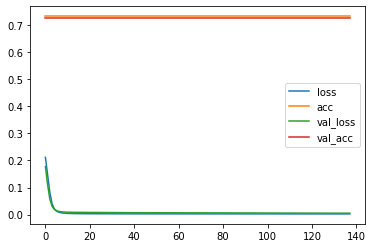

In [44]:
# check result on graph
import matplotlib.pyplot as plt

loss = history.history['loss']
acc = history.history['acc']
val_loss = history.history['val_loss']
val_acc = history.history['val_acc']

plt.plot(loss, label= 'loss')
plt.plot(acc, label= 'acc')
plt.plot(val_loss, label= 'val_loss')
plt.plot(val_acc, label= 'val_acc')

plt.legend()
plt.show()